In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings(action= 'ignore')

In [174]:
df = pd.read_csv("../Data/Data_Train.csv")

In [175]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [176]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [177]:
df.shape

(10683, 11)

This dataset contain 10,683 rows and 11 columns.

In [178]:
df.duplicated().sum()

220

There are 220 duplicate values in that dataset, Now drop all the duplicate rows.

In [179]:
df.drop_duplicates(inplace = True)

In [180]:
df.shape

(10463, 11)

Now it contain 10,463 rows and 11 columns.

In [181]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are some missing values in that dataset.



In [182]:
df.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


In [183]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [184]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print("All features :", all_col)
print("\nNumerical features :", num_col)
print("\nCategorical features :", cat_col)

All features : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']

Numerical features : ['Price']

Categorical features : ['Destination', 'Duration', 'Airline', 'Total_Stops', 'Arrival_Time', 'Additional_Info', 'Source', 'Dep_Time', 'Date_of_Journey', 'Route']


In [185]:
df.nunique().sort_values(ascending = False)

Price              1870
Arrival_Time       1343
Duration            368
Dep_Time            222
Route               128
Date_of_Journey      44
Airline              12
Additional_Info      10
Destination           6
Source                5
Total_Stops           5
dtype: int64

In [186]:
df['Date_of_Journey'].value_counts()

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     282
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [187]:
df['Jorney_day'] = df['Date_of_Journey'].str.split('/', expand = True)[0].astype('int')

In [188]:
df['Jorney_month'] = df['Date_of_Journey'].str.split('/', expand = True)[1].astype('int')

In [189]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [190]:
df.drop(columns = 'Date_of_Journey', axis = 1, inplace = True)

In [191]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [192]:
df['Jorney_day'].value_counts()

9     1375
6     1269
27    1092
21    1085
1     1058
24    1022
15     967
12     946
3      835
18     814
Name: Jorney_day, dtype: int64

In [193]:
df['Jorney_month'].value_counts()

5    3396
6    3311
3    2678
4    1078
Name: Jorney_month, dtype: int64

In [194]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

df.drop(columns = ['Dep_Time'], axis = 1, inplace = True)

In [195]:
df['Arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop(columns = ['Arrival_Time'], axis = 1, inplace = True)

In [196]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [197]:
df['hour'] = df['Duration'].str.split(expand = True)[0]
df['Min'] = df['Duration'].str.split(expand = True)[1]

In [198]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,hour,Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19h,None
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4h,45m


In [199]:
df['hour'] = df['hour'].str.split('h', expand = True)[0]
df['Min'] = df['Min'].str.split('m', expand = True)[0]
df.drop(columns = ['Duration'], axis = 1, inplace = True)

In [200]:
print(df['hour'].unique())
print("\n")
print(df['Min'].unique())

['2' '7' '19' '5' '4' '15' '21' '25' '13' '12' '26' '22' '23' '20' '10'
 '6' '11' '8' '16' '3' '27' '1' '14' '9' '18' '17' '24' '30' '28' '29'
 '37' '34' '38' '35' '36' '47' '33' '32' '31' '42' '39' '5m' '41' '40']


['50' '25' None '45' '30' '5' '15' '35' '10' '20' '55' '40']


In [201]:
df['hour'] = df['hour'].str.split('m', expand = True)[0]
df['Min'] = df['Min'].astype('int', errors = 'ignore')

In [202]:
print(df['hour'].unique())
print("\n")
print(df['Min'].unique())

['2' '7' '19' '5' '4' '15' '21' '25' '13' '12' '26' '22' '23' '20' '10'
 '6' '11' '8' '16' '3' '27' '1' '14' '9' '18' '17' '24' '30' '28' '29'
 '37' '34' '38' '35' '36' '47' '33' '32' '31' '42' '39' '41' '40']


['50' '25' None '45' '30' '5' '15' '35' '10' '20' '55' '40']


In [203]:
df['Min'].isnull().sum()

1006

In [204]:
df['Min'].fillna('0', inplace = True)

In [205]:
print(df['hour'].unique())
print("\n")
print(df['Min'].unique())

['2' '7' '19' '5' '4' '15' '21' '25' '13' '12' '26' '22' '23' '20' '10'
 '6' '11' '8' '16' '3' '27' '1' '14' '9' '18' '17' '24' '30' '28' '29'
 '37' '34' '38' '35' '36' '47' '33' '32' '31' '42' '39' '41' '40']


['50' '25' '0' '45' '30' '5' '15' '35' '10' '20' '55' '40']


In [206]:
df['hour'] = df['hour'].astype('float')
df['Min'] = df['Min'].astype('float')

In [207]:
df['Duration(min)'] = df['hour'] * 60 + df['Min']

In [208]:
df.drop(columns = ['hour', 'Min'], axis = 1, inplace = True)

In [209]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration(min)
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,285.0


In [210]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print("All features :", all_col)
print("\nNumerical features :", num_col)
print("\nCategorical features :", cat_col)

All features : ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Jorney_day', 'Jorney_month', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Duration(min)']

Numerical features : ['Price', 'Jorney_day', 'Jorney_month', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Duration(min)']

Categorical features : ['Destination', 'Airline', 'Total_Stops', 'Additional_Info', 'Source', 'Route']


In [211]:
for i in cat_col:
    print(i)
    print(df[i].value_counts())
    print("=" * 100)

Destination
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64
Additional_Info
No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports

In [212]:
df.drop(columns = ['Route'], axis = 1, inplace = True)

In [213]:
df.replace({"Additional_Info" : {'No info' : 'No Info'}}, inplace = True)

In [214]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

for i in cat_col:
    print(i)
    print(df[i].value_counts())
    print("=" * 100)

Destination
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64
Additional_Info
No Info                         8186
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports

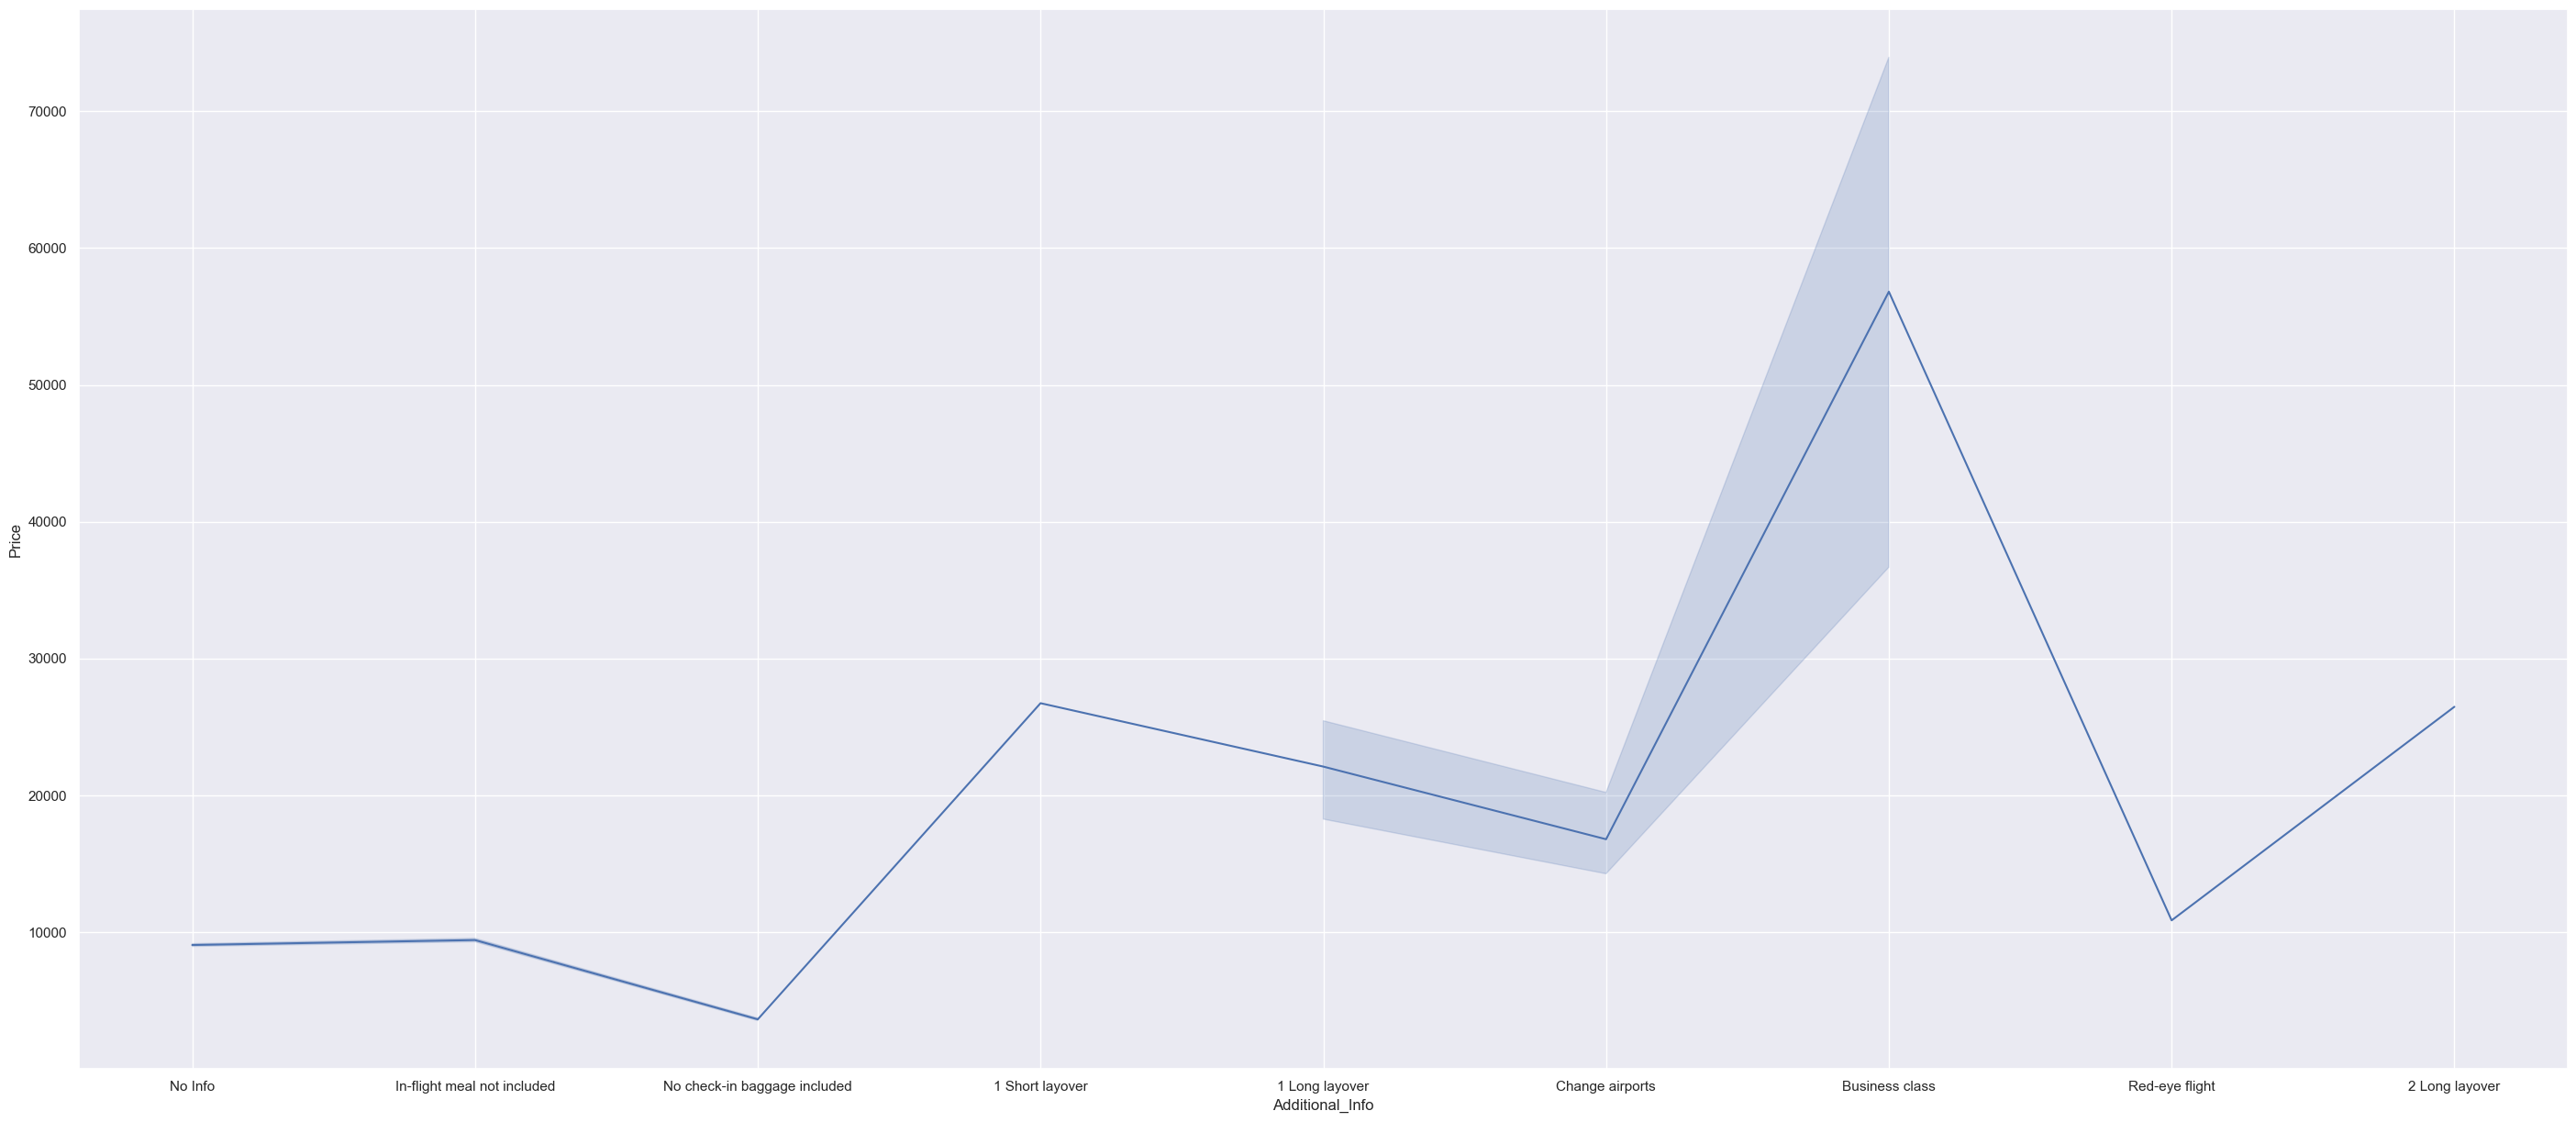

In [215]:
sns.set()
plt.figure(figsize = (35, 15))
sns.lineplot(data = df, x = 'Additional_Info', y = 'Price')
plt.show()

In [216]:
def func(x):
    if x in ["1 Long layover", "Change airports", "Business class", "1 Short layover", "Red-eye flight", "2 Long layover"]:
        return 'other'
    else:
        return x

In [217]:
df['Additional_Info'] = df['Additional_Info'].apply(func)

df['Additional_Info'].value_counts()

No Info                         8186
In-flight meal not included     1926
No check-in baggage included     318
other                             33
Name: Additional_Info, dtype: int64

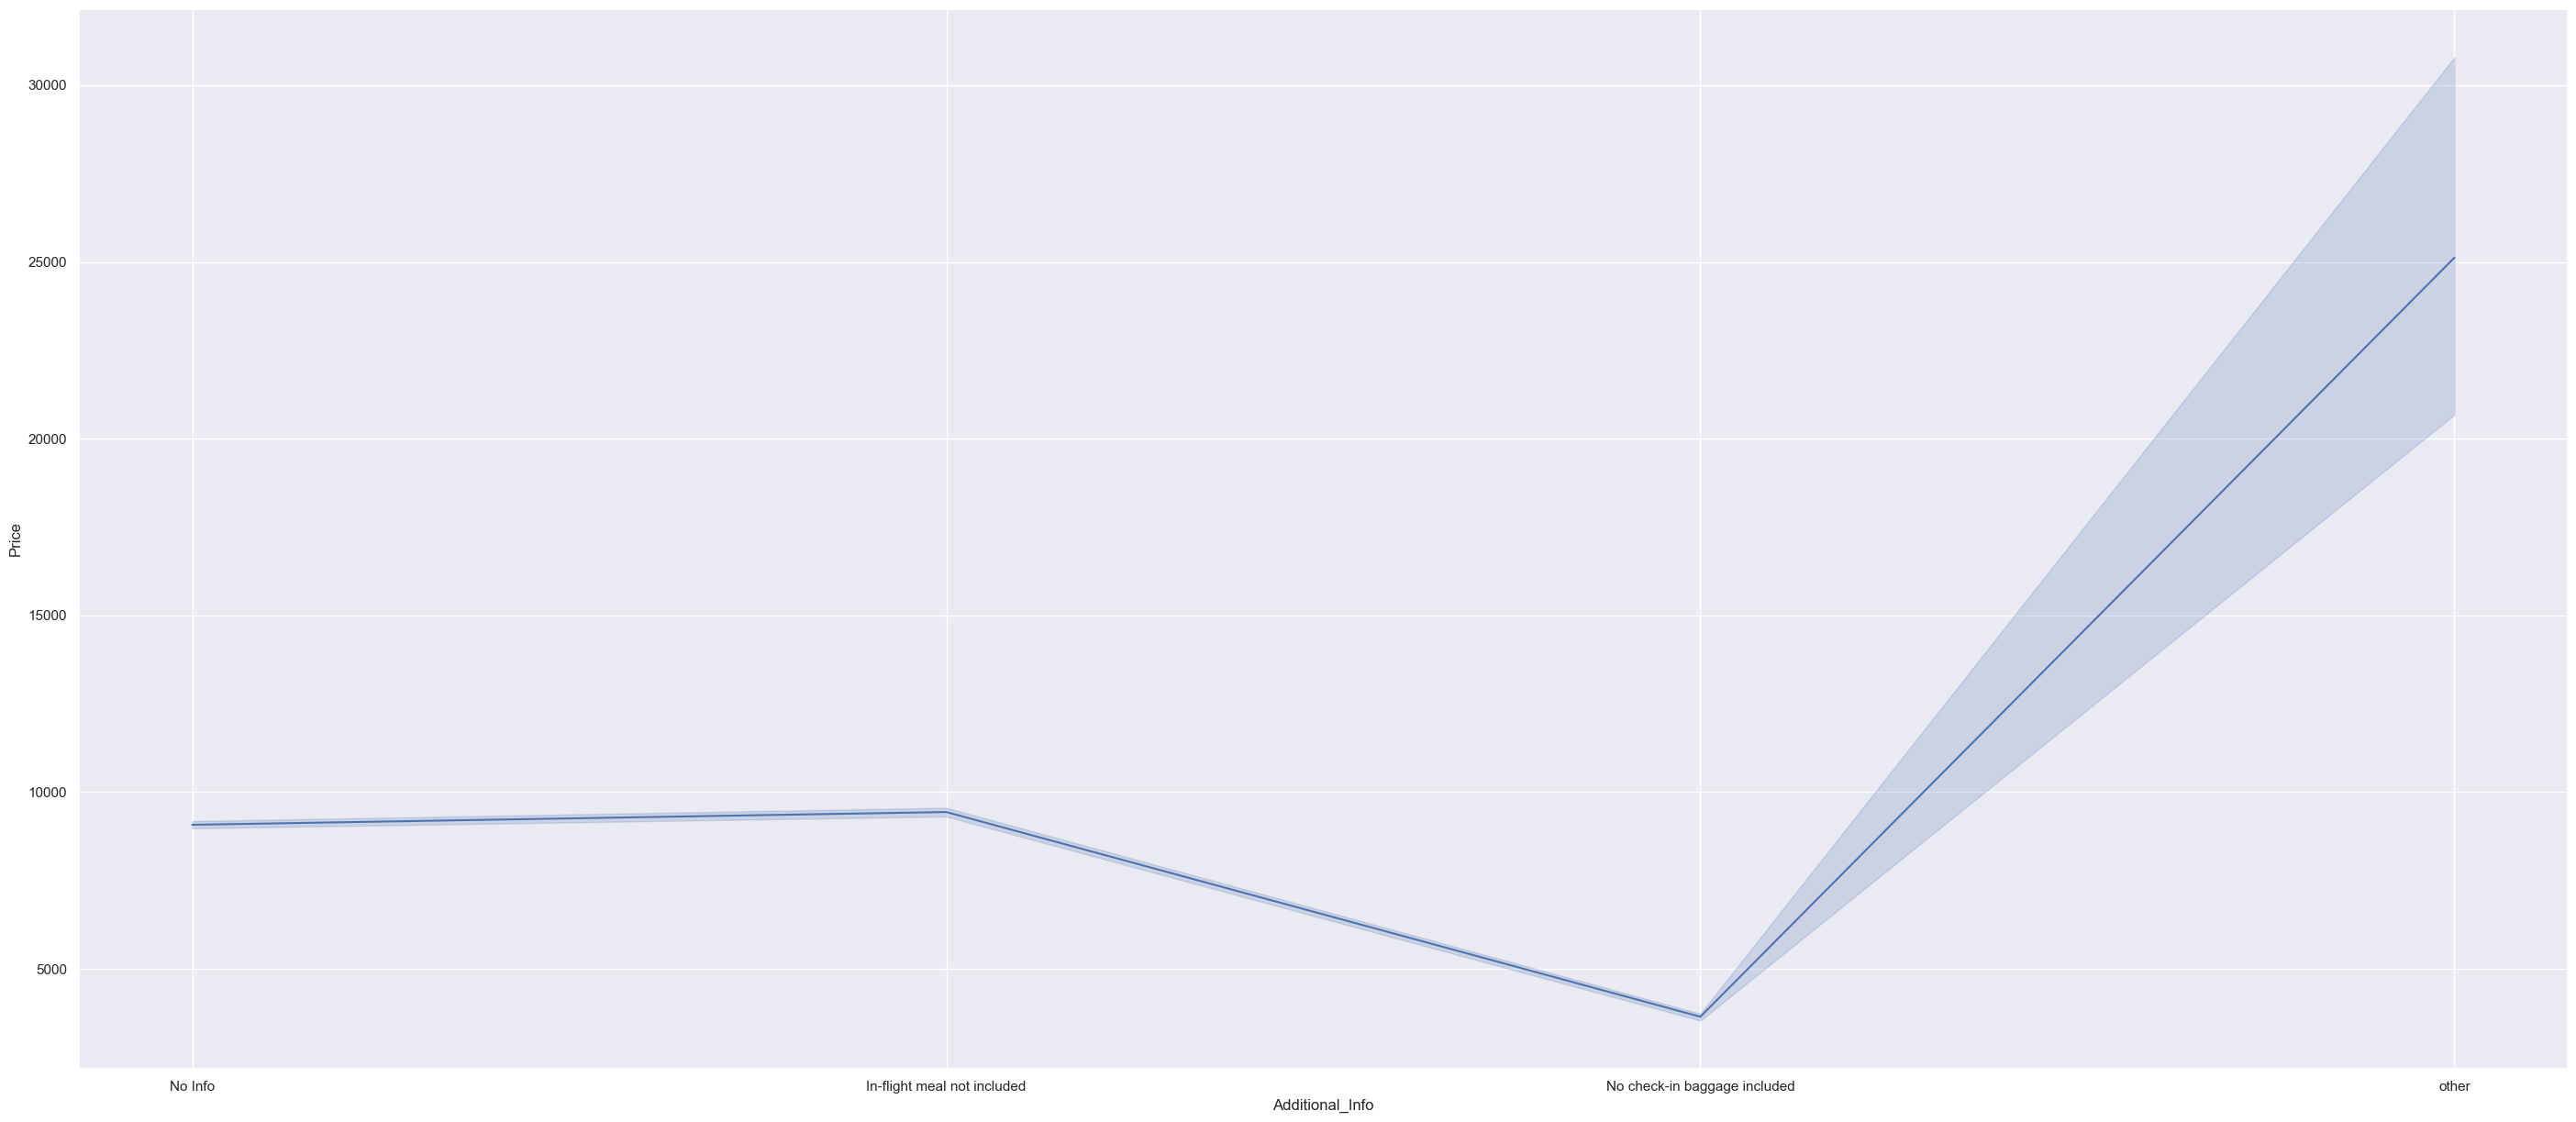

In [218]:
sns.set()
plt.figure(figsize = (35, 15))
sns.lineplot(data = df, x = 'Additional_Info', y = 'Price')
plt.show()

In [219]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration(min)
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2 stops,No Info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302,1,3,16,50,21,35,285.0


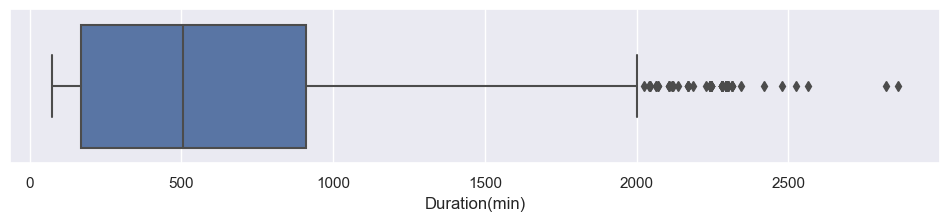

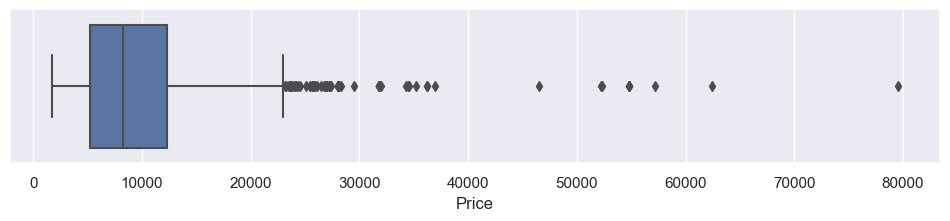

In [220]:
col_list = ['Duration(min)', 'Price']

for i in col_list:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(data = df, x = i)
    plt.show()

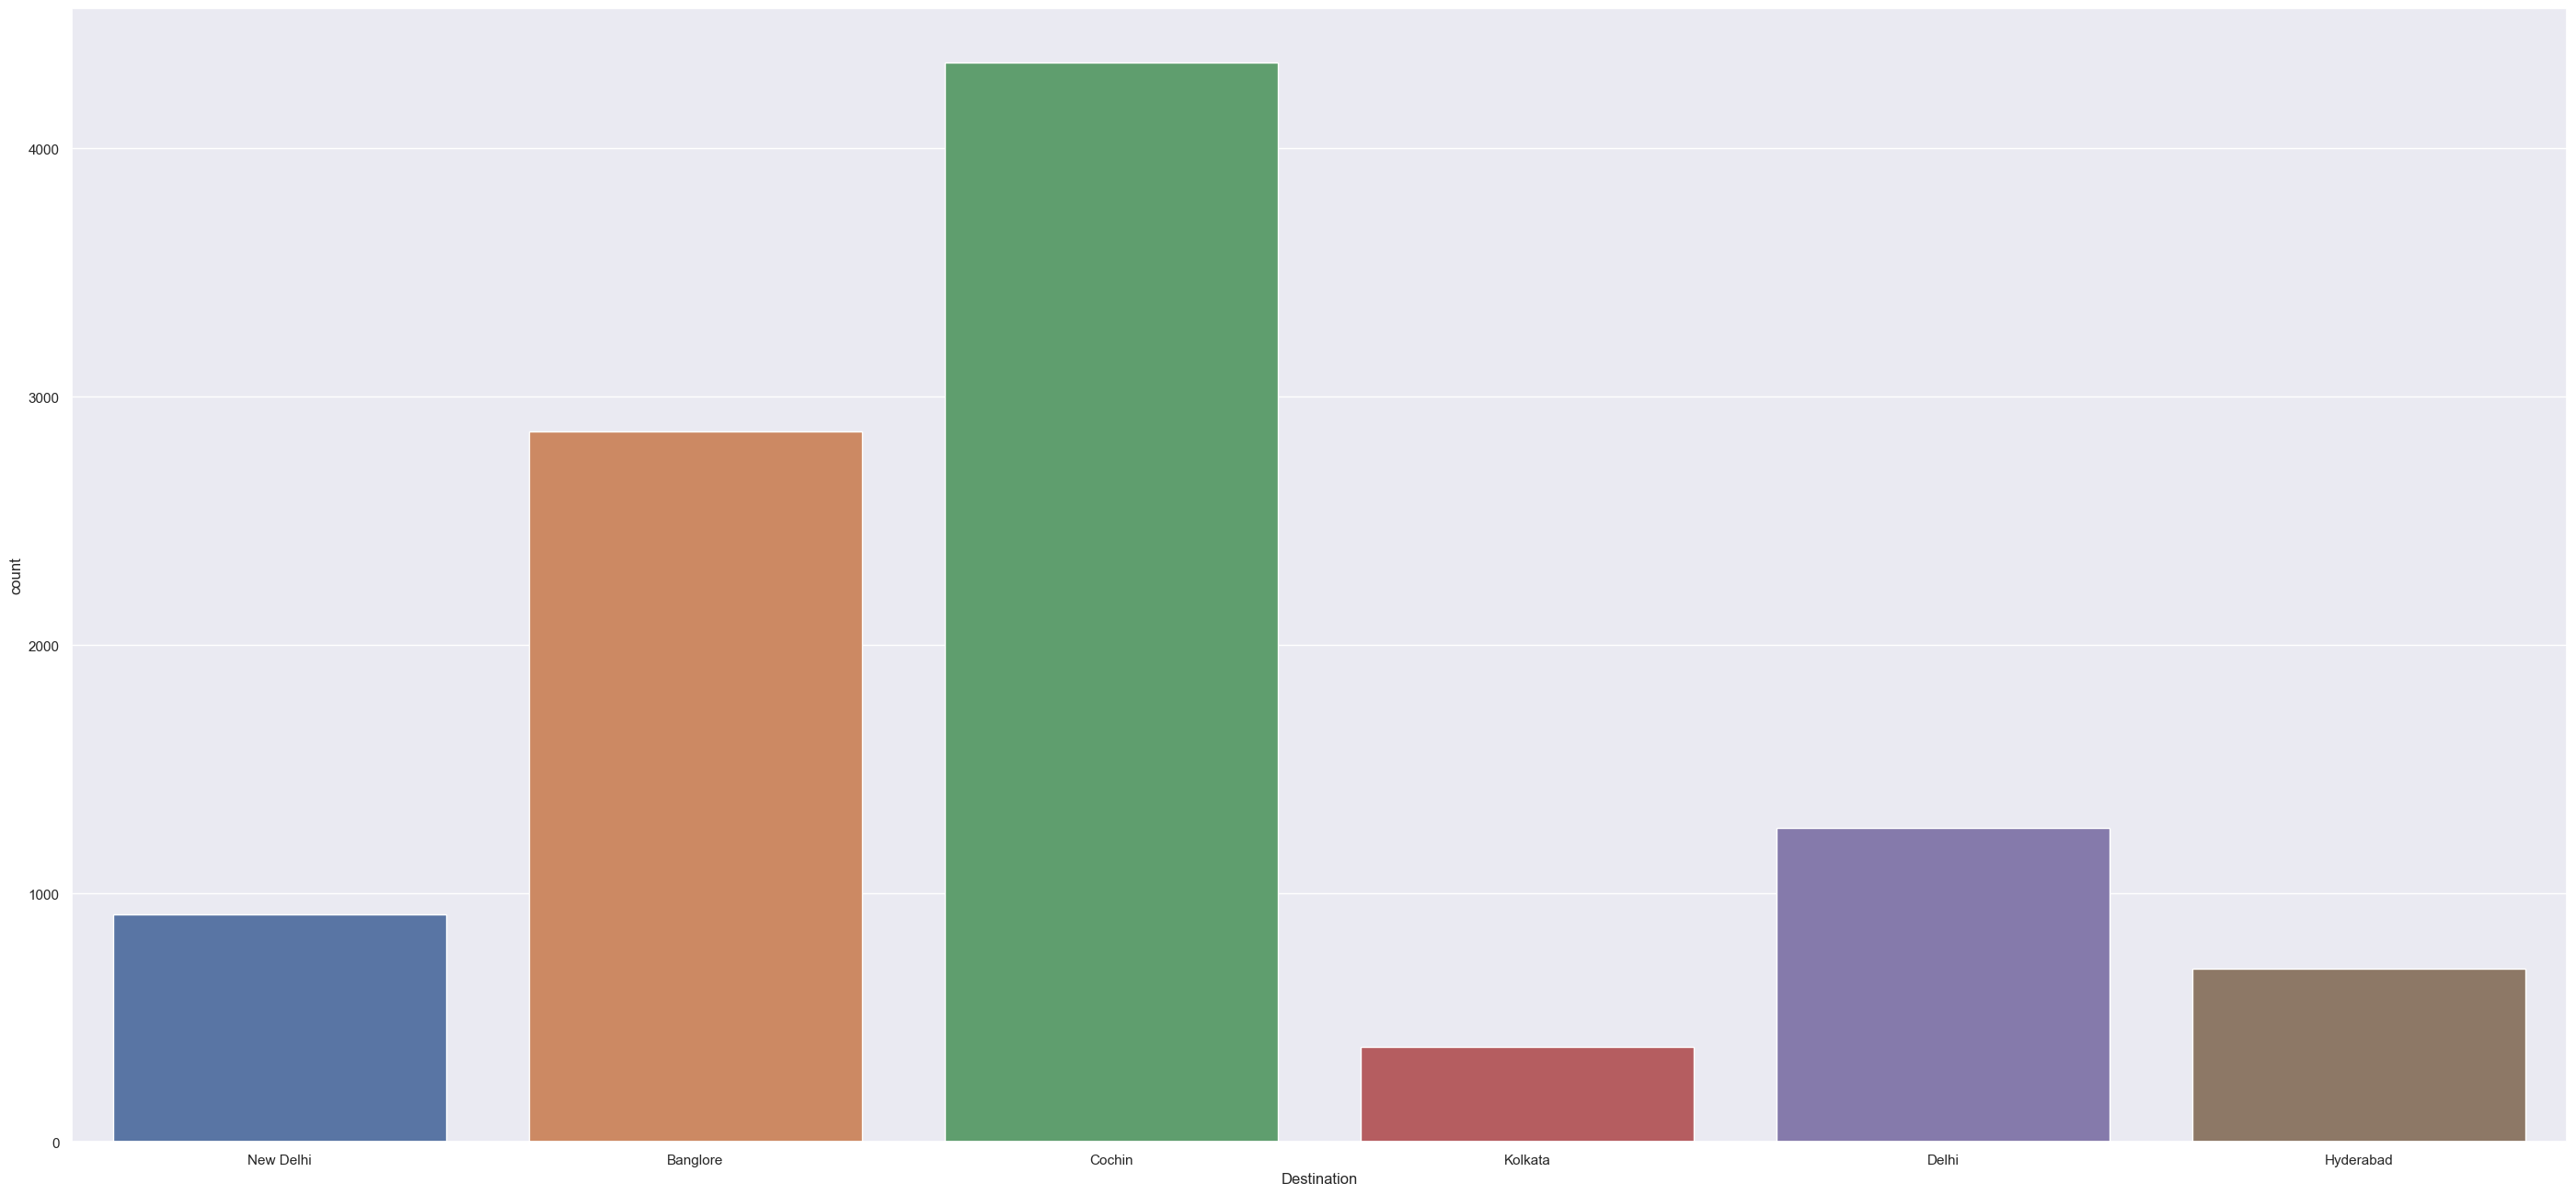

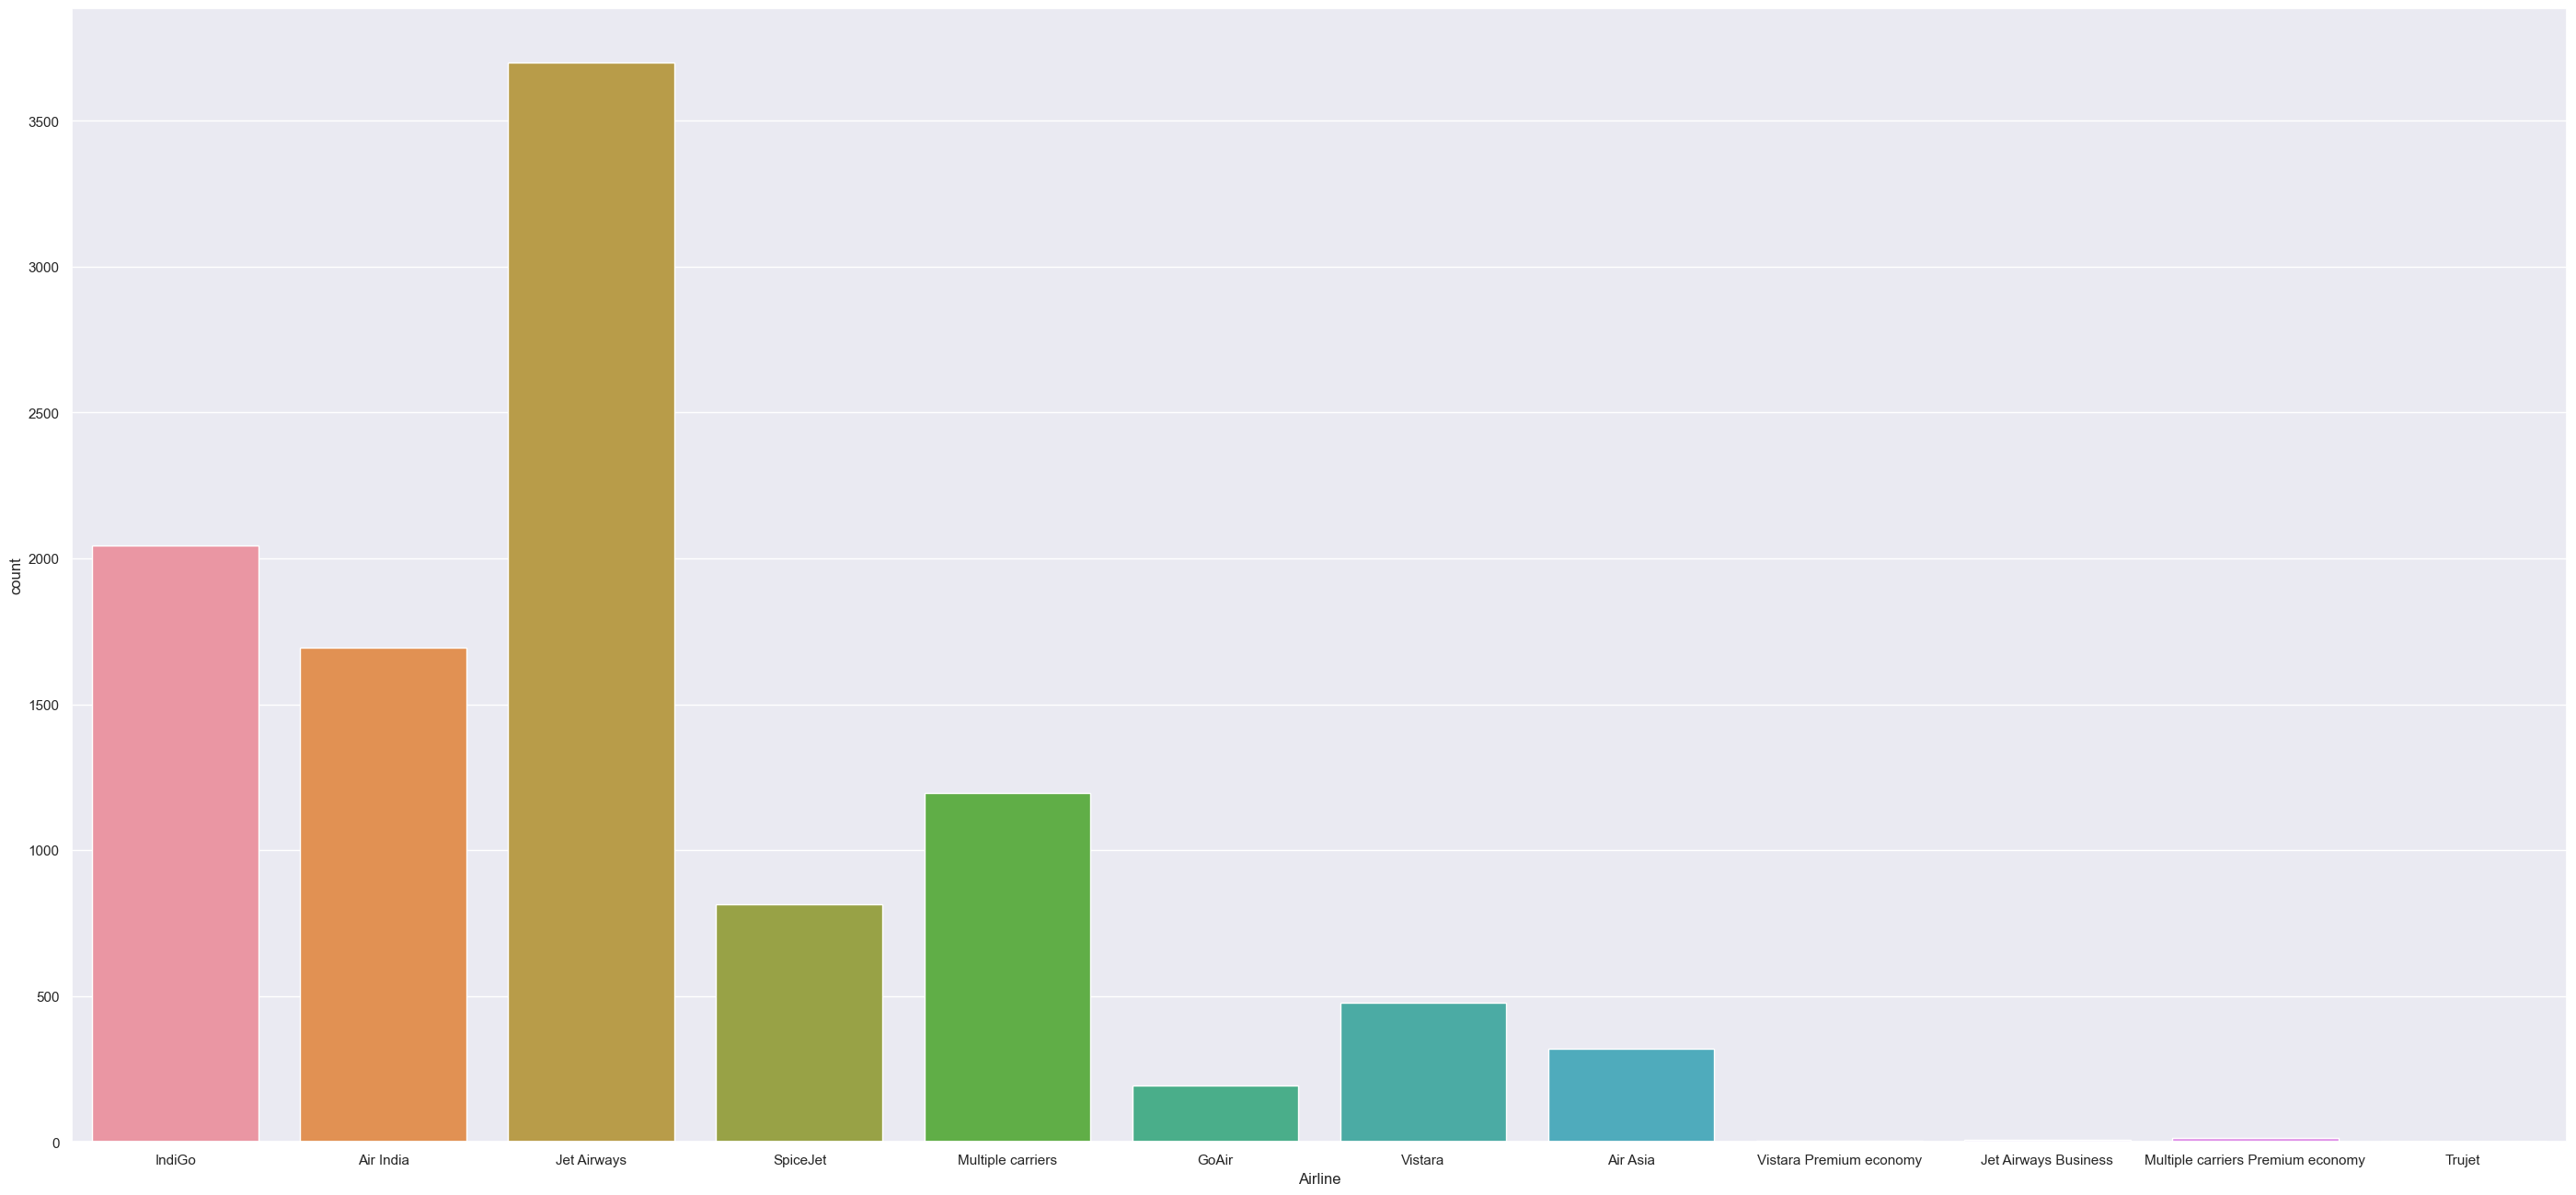

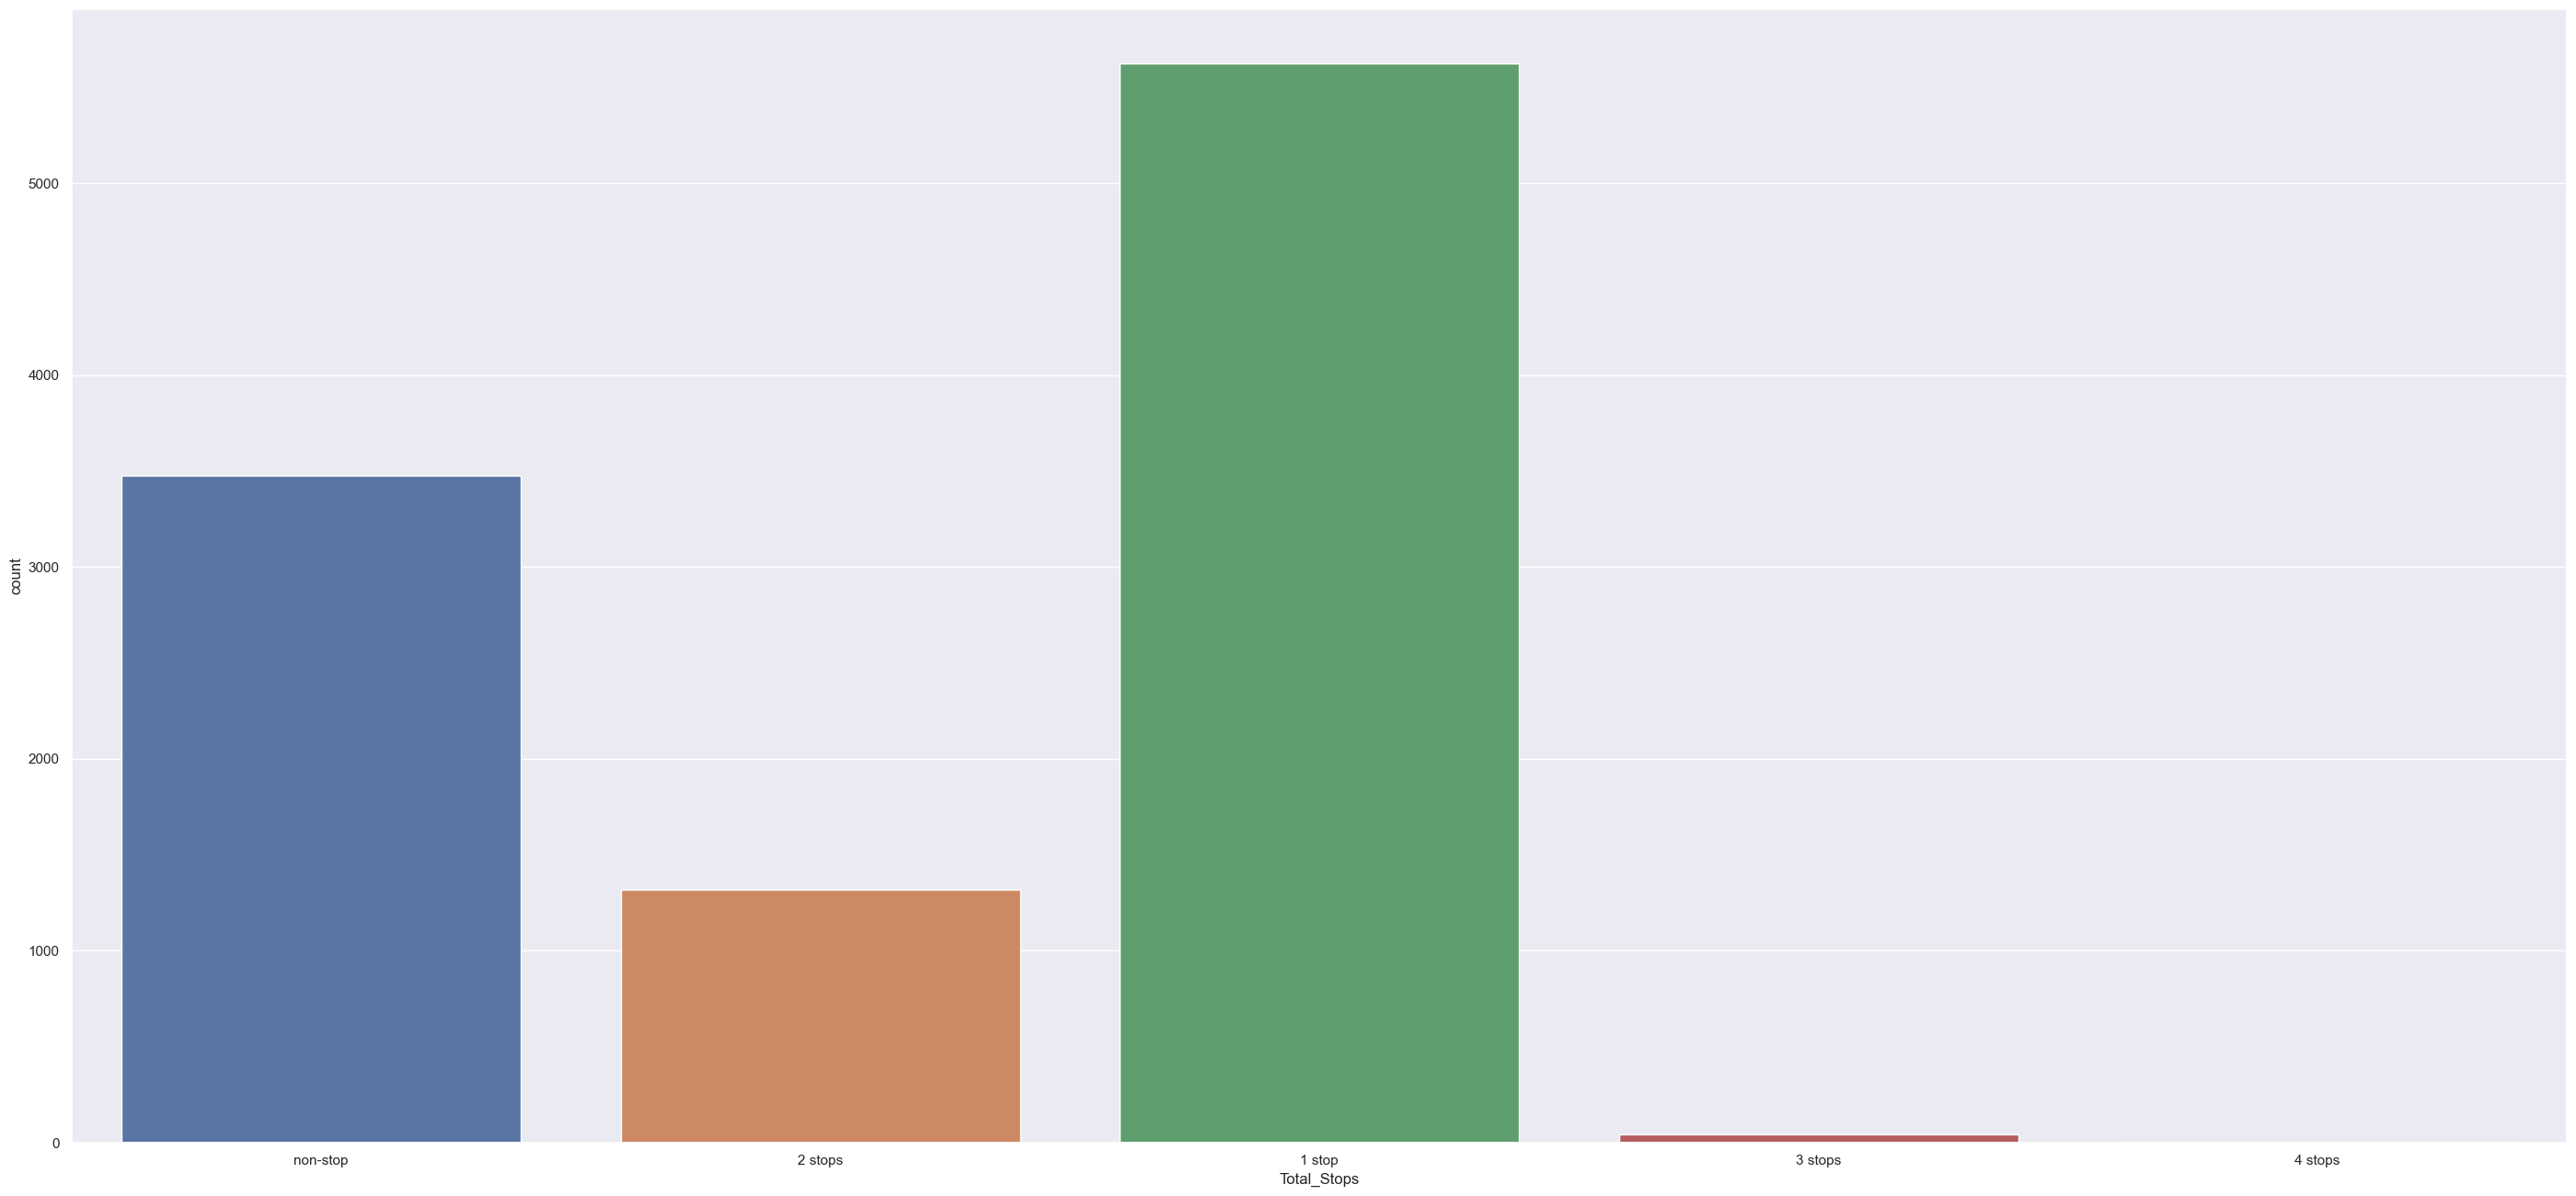

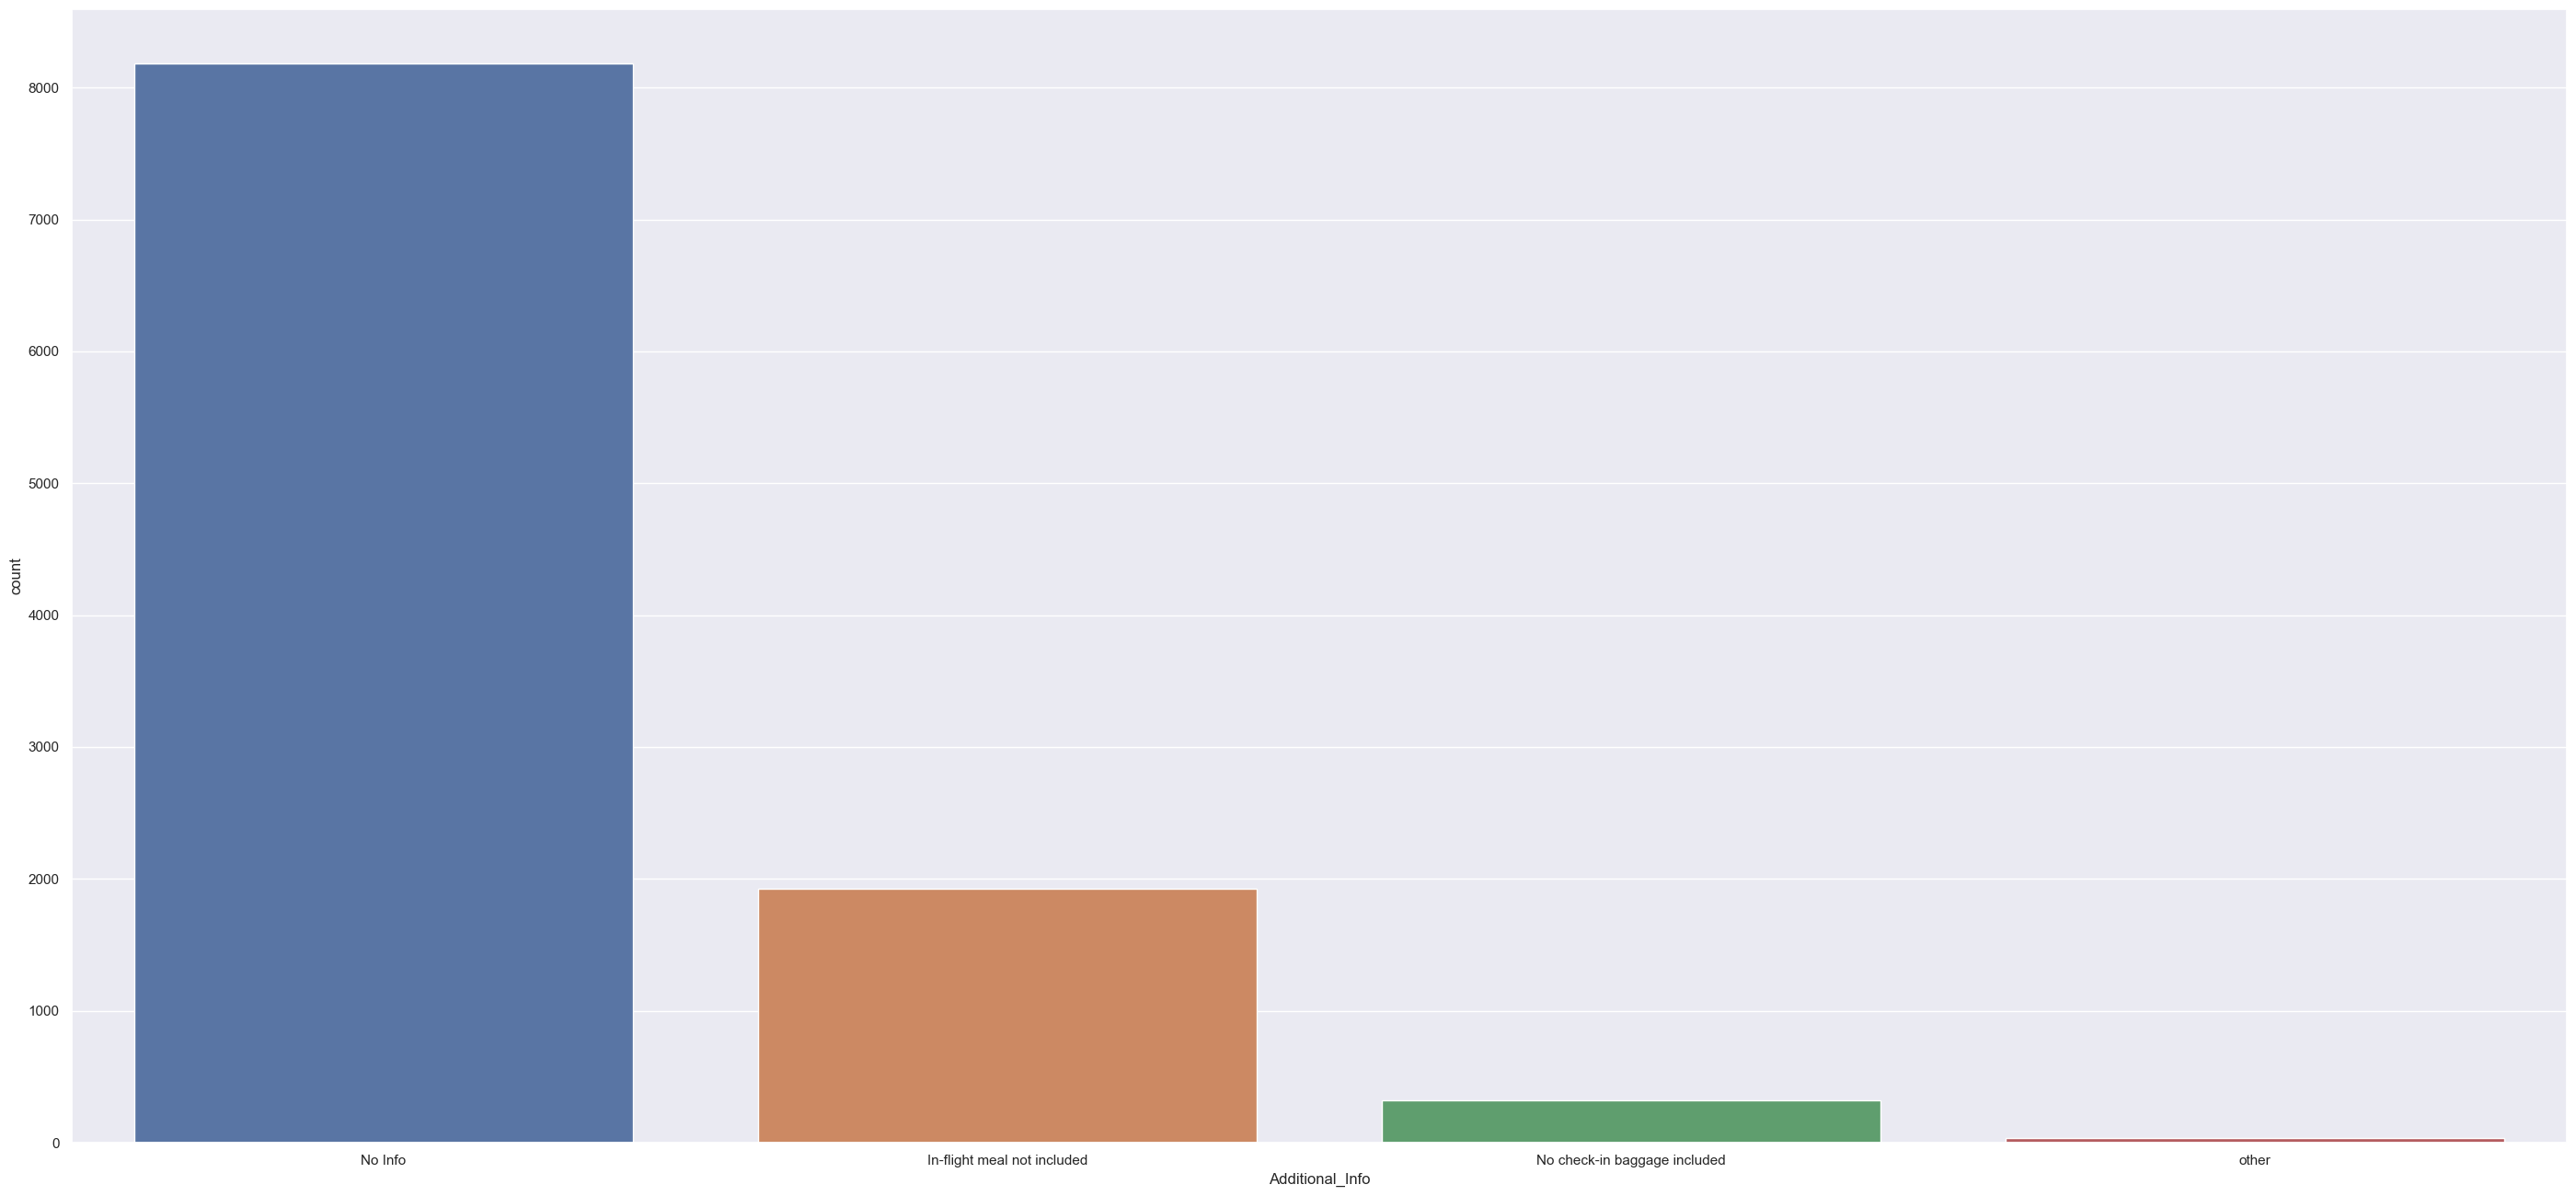

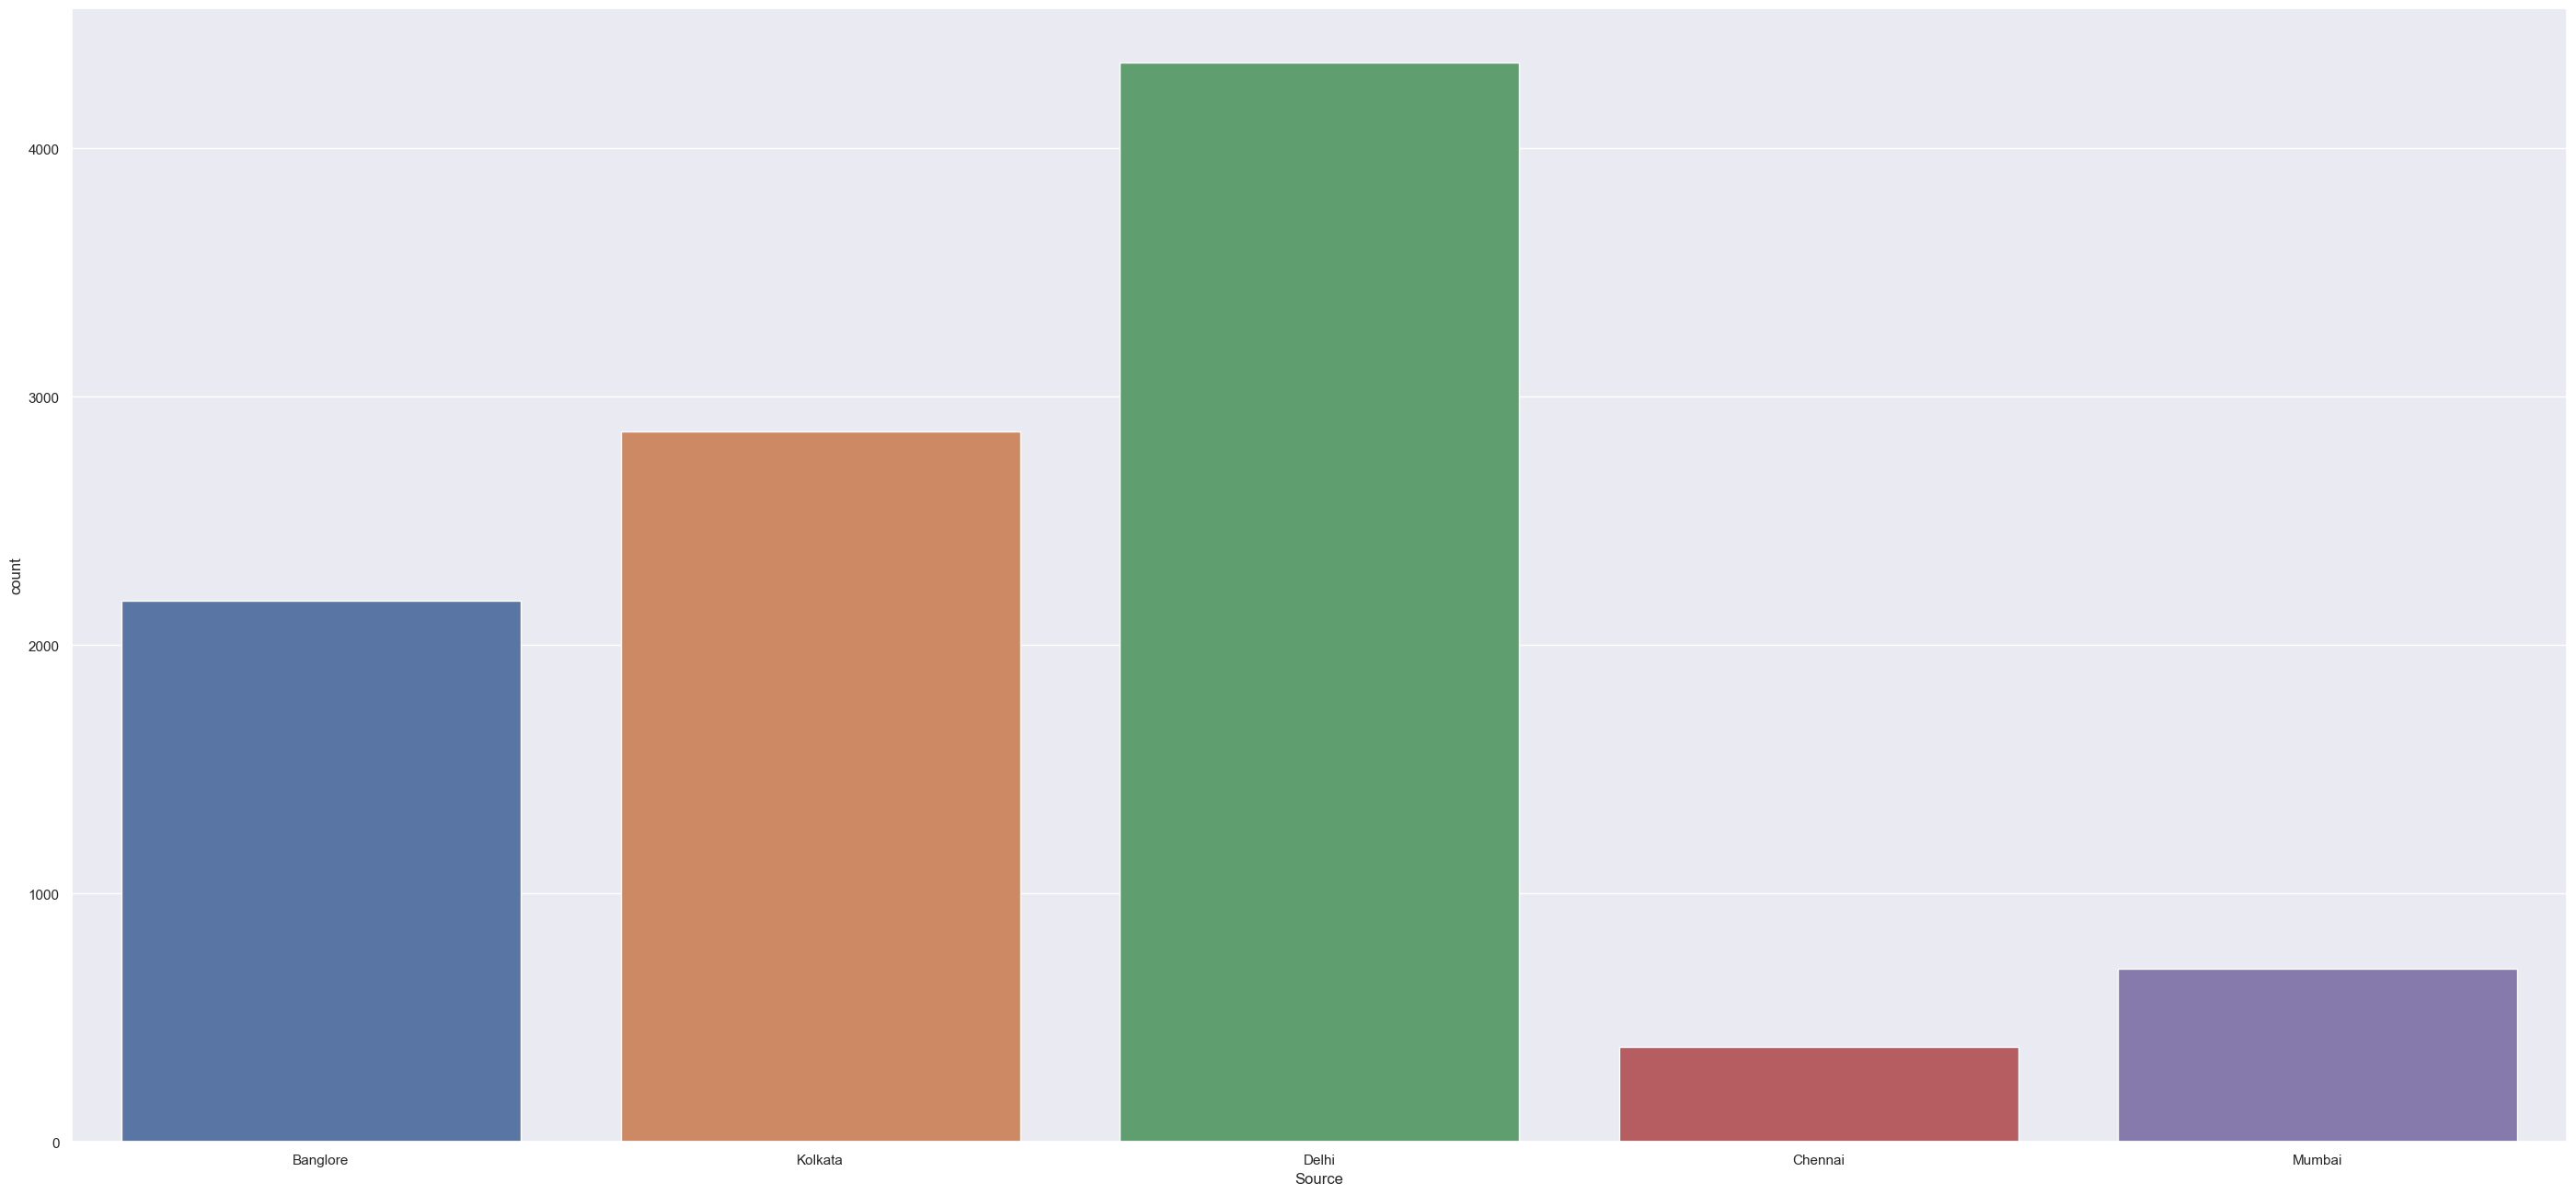

In [221]:
for i in cat_col:
    sns.set()
    plt.figure(figsize = (35, 16))
    sns.countplot(data = df, x = i)
    plt.show()

In [222]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration(min)
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2 stops,No Info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302,1,3,16,50,21,35,285.0


In [223]:
def preprocessor(df):
    df['Jorney_day'] = df['Date_of_Journey'].str.split('/', expand = True)[0].astype('int')
    df['Jorney_month'] = df['Date_of_Journey'].str.split('/', expand = True)[1].astype('int')
    df.drop(columns = 'Date_of_Journey', axis = 1, inplace = True)
    
    df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
    df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

    df.drop(columns = ['Dep_Time'], axis = 1, inplace = True)
    
    df['Arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

    df.drop(columns = ['Arrival_Time'], axis = 1, inplace = True)
    
    df['hour'] = df['Duration'].str.split(expand = True)[0]
    df['Min'] = df['Duration'].str.split(expand = True)[1]
    
    df['hour'] = df['hour'].str.split('h', expand = True)[0]
    df['Min'] = df['Min'].str.split('m', expand = True)[0]
    df.drop(columns = ['Duration'], axis = 1, inplace = True)
    
    df['hour'] = df['hour'].str.split('m', expand = True)[0]
    df['Min'] = df['Min'].astype('int', errors = 'ignore')
    
    df['Min'].fillna('0', inplace = True)
    
    df['hour'] = df['hour'].astype('float')
    df['Min'] = df['Min'].astype('float')
    
    df['Duration(min)'] = df['hour'] * 60 + df['Min']
    
    df.drop(columns = ['hour', 'Min'], axis = 1, inplace = True)
    df.drop(columns = ['Route'], axis = 1, inplace = True)
    
    df.replace({"Additional_Info" : {'No info' : 'No Info'}}, inplace = True)
    
    
    def func(x):
        if x in ["1 Long layover", "Change airports", "Business class", "1 Short layover", "Red-eye flight", "2 Long layover"]:
            return 'other'
        else:
            return x
    
    df['Additional_Info'] = df['Additional_Info'].apply(func)
    
    #df = pd.get_dummies(data = df, drop_first = True)
    

    return df

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10463 non-null  object 
 1   Source           10463 non-null  object 
 2   Destination      10463 non-null  object 
 3   Total_Stops      10462 non-null  object 
 4   Additional_Info  10463 non-null  object 
 5   Price            10463 non-null  int64  
 6   Jorney_day       10463 non-null  int32  
 7   Jorney_month     10463 non-null  int32  
 8   Dep_hour         10463 non-null  int64  
 9   Dep_min          10463 non-null  int64  
 10  Arr_hour         10463 non-null  int64  
 11  Arr_min          10463 non-null  int64  
 12  Duration(min)    10463 non-null  float64
dtypes: float64(1), int32(2), int64(5), object(5)
memory usage: 1.0+ MB


In [225]:
 #df = pd.get_dummies(data = df, drop_first = True)

In [226]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration(min)
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2 stops,No Info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302,1,3,16,50,21,35,285.0


# Split dataset

In [227]:
x = df.drop(columns = ['Price'], axis = 1)
y = df[['Price']]

In [228]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Jorney_day,Jorney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration(min)
0,IndiGo,Banglore,New Delhi,non-stop,No Info,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2 stops,No Info,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2 stops,No Info,9,6,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1 stop,No Info,1,3,16,50,21,35,285.0


In [229]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [230]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 56, train_size = 0.85)

In [231]:
preprocessor_pipe = Pipeline(steps = [
    ('One_Hot', OneHotEncoder(sparse = False, handle_unknown = 'ignore')),
    ('Standardscaler', StandardScaler()),
    ('PCA' , PCA(0.95))
])

preprocessor_pipe

Pipeline(steps=[('One_Hot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('Standardscaler', StandardScaler()),
                ('PCA', PCA(n_components=0.95))])

# Model building

In [232]:
def model_evaluating(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    
    print("MAE : ", mae)
    print("MSE : ", mse)
    print("RMSE : ", rmse)
    print("r2_score : ", r2)
    
    
    error_df = pd.DataFrame({'y_pred' : y_pred.flatten(), 'y_true' : y_true.values.flatten()})
    
    sns.set()
    plt.figure(figsize =(20, 5))
    sns.lineplot(data = error_df, x = error_df.index, y = 'y_pred')
    sns.lineplot(data = error_df, x = error_df.index, y = 'y_true')
    plt.show()
    
    sns.set()
    plt.figure(figsize = (9, 9))
    sns.scatterplot(data = error_df, x = 'y_true', y = 'y_pred', alpha = 0.5)
    plt.show()
    
    sns.set()
    plt.figure(figsize = (9, 9))
    sns.regplot(data = error_df, x = 'y_true', y = 'y_pred')
    plt.show()
    
    return error_df

In [233]:
def model_training(model, x_train, y_train, x_test, y_test, params):
    grid_search = GridSearchCV(model, param_grid = params, cv = 5, scoring='precision')
    grid_search.fit(x_train,y_train)
    
    y_pred = grid_search.predict(x_test)
    error_df = model_evaluating(y_test, y_pred)
    
    print('\n')
    print("Best parameters : ", grid_search.best_params_)
    print("Best score : ", grid_search.best_score_)
    
    return grid_search.best_estimator_, error_df

## Linear Regression

In [234]:
lr = Pipeline(steps = [
    ('preprocessor_pipe' , preprocessor_pipe),
    ('linear_regression', LinearRegression())
])

lr

Pipeline(steps=[('preprocessor_pipe',
                 Pipeline(steps=[('One_Hot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False)),
                                 ('Standardscaler', StandardScaler()),
                                 ('PCA', PCA(n_components=0.95))])),
                ('linear_regression', LinearRegression())])

In [235]:
param_grid = {
    'linear_regression__fit_intercept': [True, False],
    'linear_regression__copy_X' : [True, False]
}

MAE :  1877.083682411659
MSE :  7729019.156889356
RMSE :  2780.1113569224804
r2_score :  0.6698017495160544


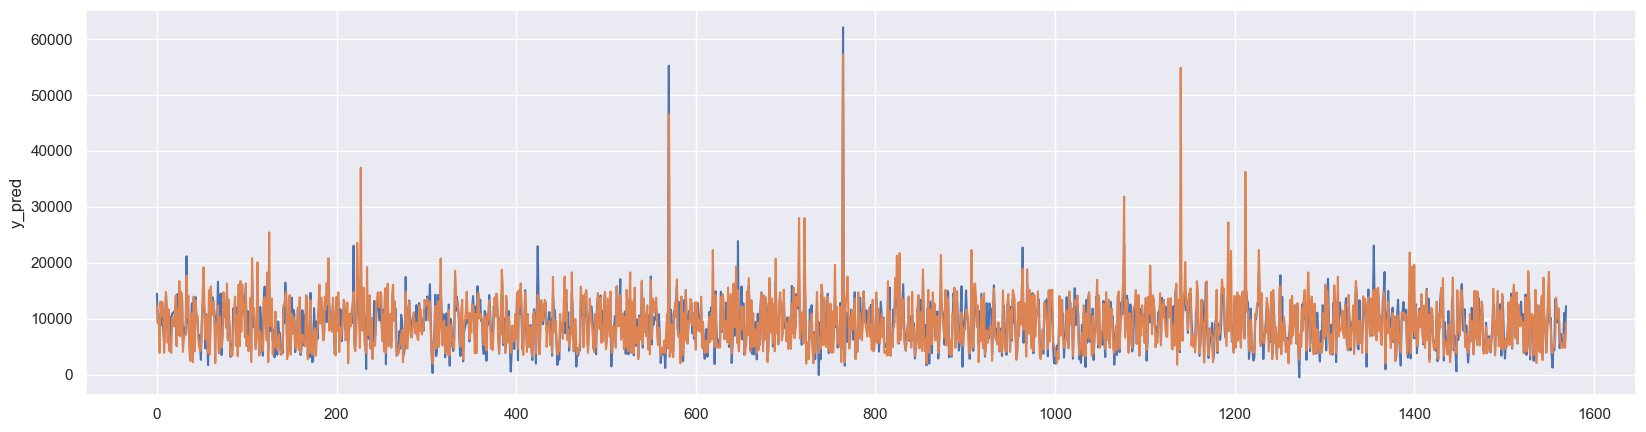

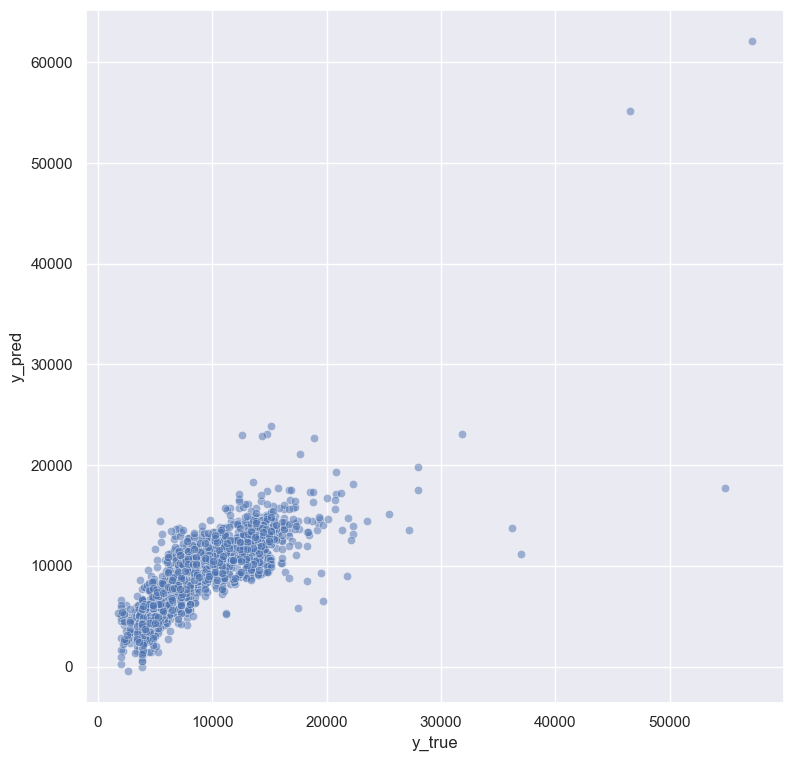

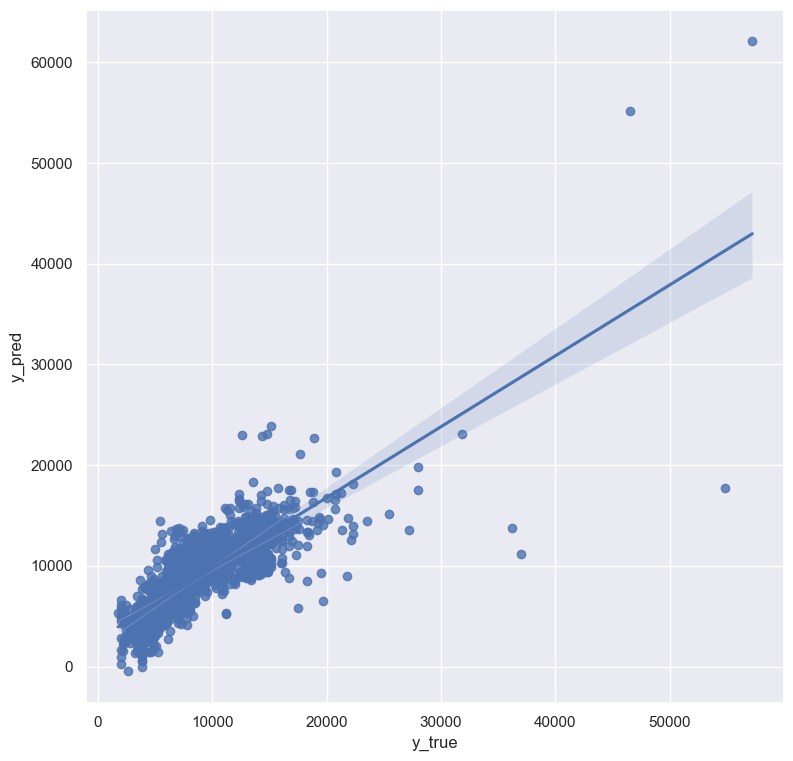



Best parameters :  {'linear_regression__copy_X': True, 'linear_regression__fit_intercept': True}
Best score :  nan


In [236]:
lr_best_estimater, lr_error_df = model_training(lr, x_train, y_train, x_test, y_test, param_grid)

In [238]:
lr_error_df

,y_pred,y_true
0,14458.604883,12273
1,9324.744084,9187
2,9840.760024,9663
3,6699.362557,3873
4,10804.796363,13044
...,...,...
1565,6211.022579,5403
1566,6056.742433,4804
1567,11042.606232,7198
1568,6069.965739,4804
